In [1]:
import IPython.display as ipd

def play_audio(samples):
    return ipd.Audio(samples.data, rate=samples.sample_rate)

In [2]:
# Create decoders from raw audio bytes or file paths

from torchcodec.decoders import AudioDecoder

debussy_fp = "./audio/debussy.wav"
duke_fp = "./audio/duke.wav"
redhot_fp = "./audio/redhot.wav"

debussy_decoder = AudioDecoder(debussy_fp)
duke_decoder = AudioDecoder(duke_fp)
redhot_decoder = AudioDecoder(redhot_fp)

In [3]:
print(debussy_decoder.metadata)

AudioStreamMetadata:
  duration_seconds_from_header: 30.0
  begin_stream_seconds_from_header: None
  bit_rate: 352800.0
  codec: pcm_s16le
  stream_index: 0
  sample_rate: 22050
  num_channels: 1
  sample_format: s16



In [4]:
# To get decoded samples, which returns an `AudioSamples` object

debussy = debussy_decoder.get_all_samples()
duke = duke_decoder.get_all_samples()
redhot = redhot_decoder.get_all_samples()

In [5]:
# Get the audio data and sample rates, play the audio

y_debussy, sr = debussy.data, debussy.sample_rate
y_duke = duke.data
y_redhot = redhot.data

#ipd.Audio(y_redhot, rate=sr)
play_audio(redhot)


In [6]:
import torch
import torch.nn.functional as F

def get_amplitude_envelope(samples, window_size, hop_size):
    W, H = window_size, hop_size
    L = samples.shape[-1]
    
    N = torch.ceil(torch.tensor(L/H)).int()

    res = torch.zeros((*samples.shape[:-1], N))

    for i in range(N):
        res[..., i] = torch.max(samples[..., i*H:i*H+W], dim=-1).values
    
    return res

In [7]:
debussy_ae = get_amplitude_envelope(y_debussy, window_size=1024, hop_size=512)
duke_ae = get_amplitude_envelope(y_duke, window_size=1024, hop_size=512)
redhot_ae = get_amplitude_envelope(y_redhot, window_size=1024, hop_size=512)

In [8]:
import matplotlib.pyplot as plt

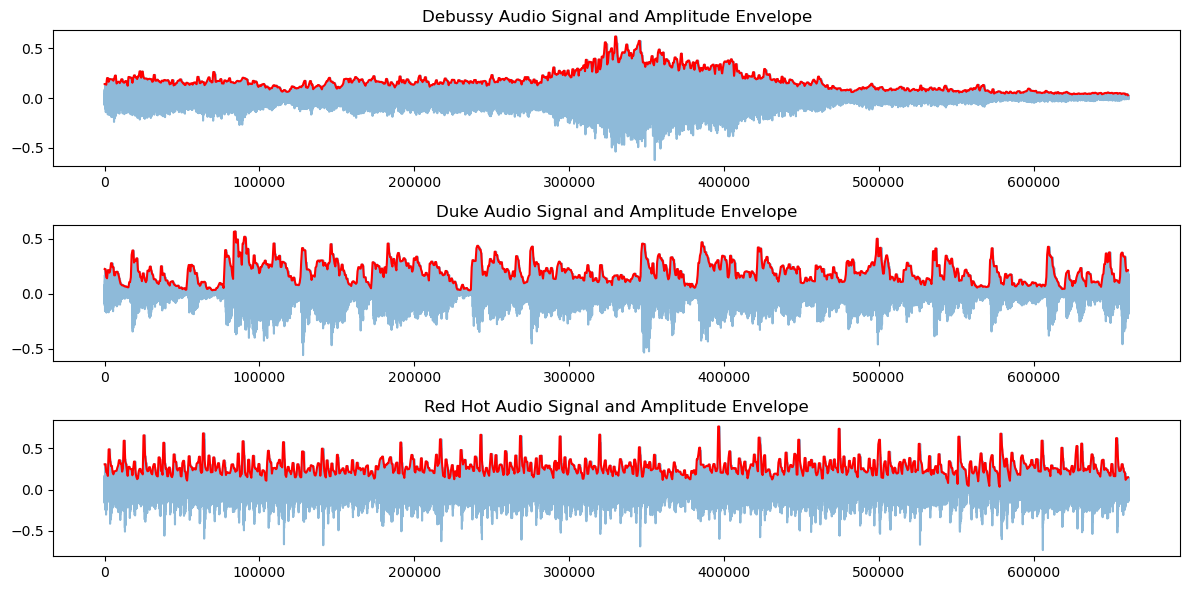

In [9]:
t = torch.arange(debussy_ae.shape[-1]) * 512
alpha = 0.5

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(y_debussy[0, :], label='Debussy', alpha=alpha)
plt.plot(t, debussy_ae[0, :], label='Debussy Amplitude Envelope', linestyle='-', color='r')
plt.title('Debussy Audio Signal and Amplitude Envelope')

plt.subplot(3, 1, 2)
plt.plot(y_duke[0, :], label='Duke', alpha=alpha)
plt.plot(t, duke_ae[0, :], label='Duke Amplitude Envelope', linestyle='-', color='r')
plt.title('Duke Audio Signal and Amplitude Envelope')

plt.subplot(3, 1, 3)
plt.plot(y_redhot[0, :], label='Red Hot', alpha=alpha)
plt.plot(t, redhot_ae[0, :], label='Red Hot Amplitude Envelope', linestyle='-', color='r')
plt.title('Red Hot Audio Signal and Amplitude Envelope')
plt.tight_layout()
plt.show()